## 1. Install and Import Dependencies

In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [21]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2 
import requests
from PIL import Image
from io import BytesIO

## 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\TG/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-3-11 Python-3.12.7 torch-2.6.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## 3. Make Detections

In [31]:
url = 'https://www.its.ucla.edu/wp-content/uploads/sites/6/2018/01/los-angeles-1396606_960_720.jpg'

In [32]:
response = requests.get(url)
if response.status_code == 200:
    img = Image.open(BytesIO(response.content))  # Chuyển thành PIL.Image
else:
    raise Exception("Không thể tải ảnh từ URL")

In [33]:
results = model(img)
results.print()

C:\Users\TG/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 614x960 1 person, 27 cars, 5 trucks
Speed: 15.2ms pre-process, 91.3ms inference, 1.0ms NMS per image at shape (1, 3, 416, 640)


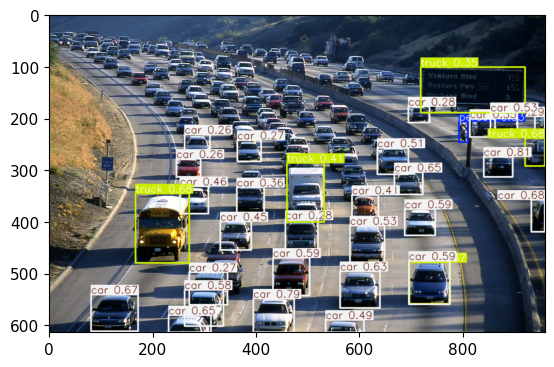

In [34]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()